# **Zadanie 1**

### **Polecenie do zadania:**

Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.

2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.

3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")

4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)

5. Utwróz model regresji liniowej za pomocą sklearn.

6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef oraz intercept. Czym one są i do czego służą?

7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).

8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)

8. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). 

Czy uzyskane wyniki z modelu są równie zadowalające?

## **Kod:**

In [1]:
#1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn".
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
data_scores = pd.read_csv("/content/drive/MyDrive/Bazy danych/Lab7/SCORES.csv")

data_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
data_scores.shape

(25, 2)

Text(0, 0.5, 'Scores')

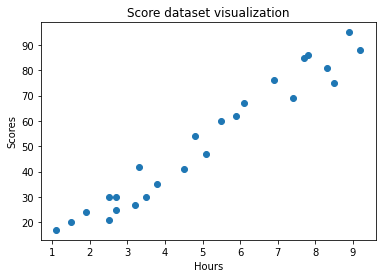

In [3]:
#3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter").

plt.scatter(data_scores.Hours, data_scores.Scores) 
plt.title("Score dataset visualization")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [4]:
#4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, 
# a następnie podziel zbiór na dane testowe i treningowe (30%)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data_scores.Hours, data_scores.Scores, test_size=0.3)

#5. Utwróz model regresji liniowej za pomocą sklearn.

X_train = np.array(X_train).reshape(-1, 1)  #-1 infers the size of the new dimension from the size of the input array.
y_train = np.array(y_train).reshape(-1, 1)
reg = LinearRegression().fit(X_train, y_train)

In [5]:
#6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef oraz intercept. Czym one są i do czego służą?

print("Regression coef: ", reg.coef_[0])
print("Regression intercept: ", reg.intercept_)

Regression coef:  [9.38913183]
Regression intercept:  [3.91553055]


In [6]:
#7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

y_pred = reg.predict(X_test)

for i in range(len(y_pred)):
    print("y_test: {}, y_pred: {}, różnica między y_pred a y_test: {} \n".format(y_pred[i], y_test[i],  y_pred[i] - y_test[i]))

y_test: [21.75488103], y_pred: [24], różnica między y_pred a y_test: [-2.24511897] 

y_test: [29.2661865], y_pred: [25], różnica między y_pred a y_test: [4.2661865] 

y_test: [48.98336334], y_pred: [54], różnica między y_pred a y_test: [-5.01663666] 

y_test: [83.72315113], y_pred: [75], różnica między y_pred a y_test: [8.72315113] 

y_test: [77.15075884], y_pred: [86], różnica między y_pred a y_test: [-8.84924116] 

y_test: [87.47880386], y_pred: [95], różnica między y_pred a y_test: [-7.52119614] 

y_test: [36.77749196], y_pred: [30], różnica między y_pred a y_test: [6.77749196] 

y_test: [76.21184566], y_pred: [85], różnica między y_pred a y_test: [-8.78815434] 



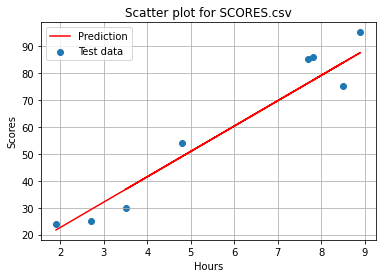

In [7]:
#8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta).
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

plt.grid(True)
plt.title("Scatter plot for SCORES.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(['Prediction', 'Test data'])

In [8]:
#9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), 
# błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

error_absol = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error: {}\n".format(error_absol))

error_squar = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error: {}\n".format(error_squar))

error_sqrt = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error: {}\n".format(error_sqrt))

Mean Absolute Error: 6.523397106109325

Mean Squared Error: 47.81805372110504

Root Mean Squared Error: 6.915059921729171



### **Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP).**

Czy uzyskane wyniki z modelu są równie zadowalające?

In [9]:
data_sbp = pd.read_csv("/content/drive/MyDrive/Bazy danych/Lab7/SBP.csv")

In [10]:
data_sbp.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


Text(0, 0.5, 'SBP')

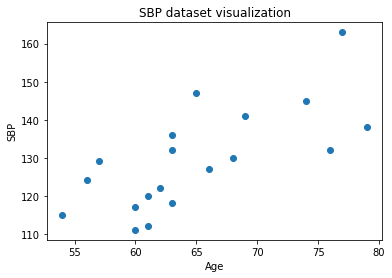

In [11]:
#3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter").

plt.scatter(data_sbp.Age, data_sbp.SBP) 
plt.title("SBP dataset visualization")
plt.xlabel("Age")
plt.ylabel("SBP")

Regression coef:  [1.40077691]

Regression intercept:  [40.25749168]

Mean Absolute Error: 10.972512023677403

Mean Squared Error: 132.8808918934568

Root Mean Squared Error: 11.527397446668385



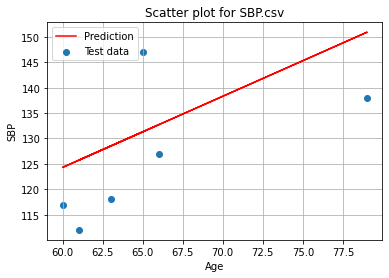

In [12]:
#4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y)
X_train, X_test, y_train, y_test = train_test_split(data_sbp.Age, data_sbp.SBP, test_size=0.3)

#5. Utwróz model regresji liniowej za pomocą sklearn.
X_train = np.array(X_train).reshape(-1, 1)  #-1 infers the size of the new dimension from the size of the input array.
y_train = np.array(y_train).reshape(-1, 1)
reg = LinearRegression().fit(X_train, y_train)

#6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef oraz intercept.
print("Regression coef: ", reg.coef_[0])
print("\nRegression intercept: ", reg.intercept_)

#7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_pred = reg.predict(X_test)

#8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta).
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

plt.grid(True)
plt.title("Scatter plot for SBP.csv")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.legend(['Prediction', 'Test data'])

#9. Dokonaj walidacji uzyskanych predykcji: średni błąd bezwzględny, błąd średniokwadratowy oraz pierwiastek błędu średniokwadratowego

error_absol = np.mean(np.abs(y_pred - y_test))
print("\nMean Absolute Error: {}\n".format(error_absol))

error_squar = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error: {}\n".format(error_squar))

error_sqrt = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error: {}\n".format(error_sqrt))

# **Zadanie 2**

In [13]:
#Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. 
data_petrol = pd.read_csv("/content/drive/MyDrive/Bazy danych/Lab7/PETROL.csv")

data_petrol.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [14]:
data_petrol.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


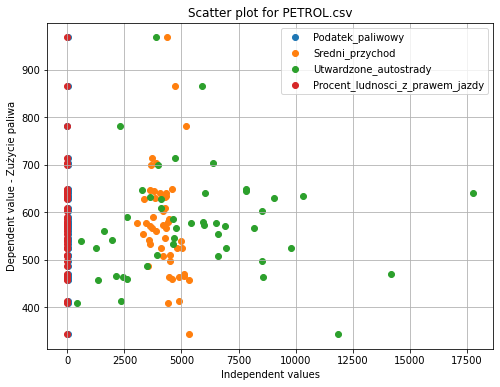

In [15]:
#Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory.
x = list(data_petrol.columns)
x = x[:-1]
x = np.array(x).reshape(-1, 1)  #-1 infers the size of the new dimension from the size of the input array.

y = data_petrol.Zuzycie_paliwa

#Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.
fig = plt.figure(figsize=(8, 6))
plt.scatter(data_petrol[x[0][0]], y)
plt.scatter(data_petrol[x[1][0]], y)
plt.scatter(data_petrol[x[2][0]], y)
plt.scatter(data_petrol[x[3][0]], y)

plt.grid(True)
plt.title("Scatter plot for PETROL.csv")
plt.xlabel("Independent values")
plt.ylabel("Dependent value - Zużycie paliwa")
plt.legend(['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'])

In [17]:
x_new.columns[0]

'Podatek_paliwowy'

regr.coef_: [-4.56009027e+01 -7.33202459e-02 -9.79966704e-03  9.62081940e+02]

regr.intercept_: 748.9473985887018



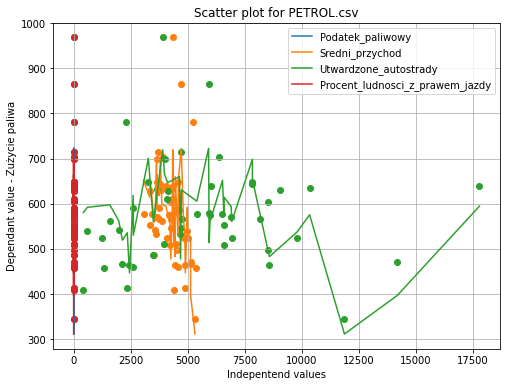

     Predicted  Actual  Difference
2   597.621777     561   36.621777
11  397.175990     471  -73.824010
17  630.357226     714  -83.642774
31  614.293731     554   60.293731
30  593.547129     571   22.547129
47  537.529861     524   13.529861
26  605.644470     577   28.644470
8   482.974645     464   18.974645
35  698.508832     644   54.508832
32  651.710597     577   74.710597
23  477.816790     547  -69.183210
36  594.643189     640  -45.356811
39  719.415975     968 -248.584025
3   535.773360     414  121.773360
4   580.753334     410  170.753334
28  560.174109     574  -13.825891
0   562.441552     541   21.441552
13  581.135653     508   73.135653
12  560.880796     525   35.880796
33  646.678956     628   18.678956
21  592.059320     540   52.059320
24  530.414742     460   70.414742
40  660.341945     587   73.341945
7   519.380221     467   52.380221
20  654.070925     649    5.070925
10  513.894183     580  -66.105817
34  559.750418     487   72.750418
15  575.595717     6

In [18]:
from sklearn import datasets, linear_model, metrics

x_new = data_petrol[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']]
X_train, X_test, y_train, y_test = train_test_split(x_new, y, train_size=0.3)

regr = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("regr.coef_: {}\n".format(regr.coef_))
print("regr.intercept_: {}\n".format(regr.intercept_))

fig = plt.figure(figsize = (8, 6))

plt.scatter(x_new['Podatek_paliwowy'], y)
plt.scatter(x_new['Sredni_przychod'], y)
plt.scatter(x_new['Utwardzone_autostrady'], y)
plt.scatter(x_new['Procent_ludnosci_z_prawem_jazdy'], y)

plt1 = pd.DataFrame({'Test_data': X_test['Podatek_paliwowy'], 'Predicted': y_pred})
plt1 = plt1.sort_values("Test_data")

plt2 = pd.DataFrame({'Test_data': X_test['Sredni_przychod'], 'Predicted': y_pred})
plt2 = plt2.sort_values("Test_data")

plt3 = pd.DataFrame({'Test_data': X_test['Utwardzone_autostrady'], 'Predicted': y_pred})
plt3 = plt3.sort_values("Test_data")

plt4 = pd.DataFrame({'Test_data': X_test['Procent_ludnosci_z_prawem_jazdy'], 'Predicted': y_pred})
plt4 = plt4.sort_values("Test_data")

plt.plot(plt1[['Test_data']], plt1[['Predicted']], label='Podatek_paliwowy')
plt.plot(plt2[['Test_data']], plt2[['Predicted']], label='Sredni_przychod')
plt.plot(plt3[['Test_data']], plt3[['Predicted']], label='Utwardzone_autostrady')
plt.plot(plt4[['Test_data']], plt4[['Predicted']], label='Procent_ludnosci_z_prawem_jazdy')

plt.grid(True)
plt.title("Scatter plot for PETROL.csv")
plt.xlabel("Indepentend values")
plt.ylabel("Dependant value - Zużycie paliwa")
plt.legend()
plt.show()

subtraction = y_pred - y_test
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test, 'Difference': subtraction})
print(df,'\n')

error_absol = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error: {}\n".format(error_absol))

error_squar = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error: {}\n".format(error_squar))

error_sqrt = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error: {}\n".format(error_sqrt))

# **Zadanie 3**

### **Polecenie:**

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.

2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.

3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.

4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.

5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).

6. Utwróz model regresji logistycznej.

7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

### **Kod**

In [20]:
# 2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
data_heart = pd.read_csv("/content/drive/MyDrive/Bazy danych/Lab7/HEART.csv", na_values='?') #3. Przetworzenie danych, 
                                                                                            #tj: oznaczenie braku danych ("?") na NaN
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [21]:
#Usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny):
data_heart = data_heart.drop(['slope', 'ca', 'thal'], axis = 1)

#Usunięcie wierszy z brakującymi wartościami.
data_heart = data_heart.dropna()

data_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [22]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    float64
 4   chol        261 non-null    float64
 5   fbs         261 non-null    float64
 6   restecg     261 non-null    float64
 7   thalach     261 non-null    float64
 8   exang       261 non-null    float64
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [23]:
#4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). 
#(kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.)
data_heart['cp'].value_counts(dropna=False)
data_heart['restecg'].value_counts(dropna=False)

data_heart = pd.get_dummies(data_heart, columns=['cp', 'restecg'], drop_first=True)
data_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


(52, 14)
(209, 14)
0    0.615385
1    0.384615
Name: num       , dtype: float64
0    0.626794
1    0.373206
Name: num       , dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Receiver operating characteristic curve')

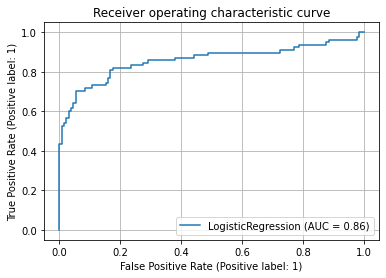

In [24]:
#5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu
#A następnie podziel zbiór na dane testowe i treningowe (20%):

from sklearn.preprocessing import StandardScaler
heart_train, heart_test = train_test_split(data_heart, train_size=0.2, random_state=1, stratify=data_heart['num       '])

print(heart_train.shape)
print(heart_test.shape)
print(heart_train['num       '].value_counts(normalize=True))
print(heart_test['num       '].value_counts(normalize=True))


#6. Utwróz model regresji logistycznej.
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(data_heart.columns) - set(num_cols) - {'num       '})
cat_cols.sort()

def feat_target(data_heart, num_cols, cat_cols, scaler):
    scaler = StandardScaler()
    scaler.fit(heart_train[num_cols])
    X_num_scaled = scaler.transform(data_heart[num_cols])
    X_cat = data_heart[cat_cols].to_numpy()
    X = np.hstack((X_cat, X_num_scaled))
    y = data_heart['num       ']
    return X, y

scaler = StandardScaler()
scaler.fit(heart_train[num_cols])

X, y = feat_target(heart_train, num_cols, cat_cols, scaler)
linear_mod = linear_model.LogisticRegression(penalty='none').fit(X, y)

X_test, y_test = feat_target(heart_test, num_cols, cat_cols, scaler)
metrics.plot_roc_curve(linear_mod, X_test, y_test)
plt.grid(True)
plt.title('Receiver operating characteristic curve')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precission recall curve')

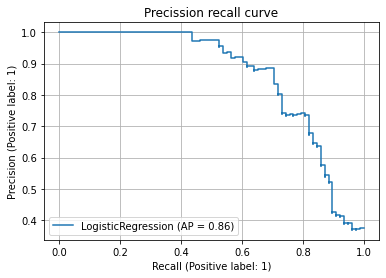

In [25]:
metrics.plot_precision_recall_curve(linear_mod, X_test, y_test)
plt.grid(True)
plt.title('Precission recall curve')

In [26]:
coeff = np.hstack((linear_mod.intercept_, linear_mod.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + num_cols, 'coefficient': coeff})

,variable,coefficient
0,intercept,-16.748372
1,cp_2,14.108772
2,cp_3,14.048337
3,cp_4,15.178087
4,exang,1.684843
5,fbs,0.000000
6,restecg_1.0,-0.867705
7,restecg_2.0,0.000000
8,sex,0.869788
9,age,-0.554903


In [27]:
test_probal = linear_mod.predict_proba(X_test)[:, 1]
test_pred = linear_mod.predict(X_test)

print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, test_pred)))   #0.5 as threshold
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, test_pred)))   #0.5 as threshold
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, test_pred)))   #0.5 as threshold
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, test_pred)))   #0.5 as threshold

print('\nLog loss = {:.5f}'.format(metrics.log_loss(y_test, test_probal)))
print('AUC = {:.5f}'.format(metrics.roc_auc_score(y_test, test_probal)))
print('Average Precision = {:.5f}'.format(metrics.average_precision_score(y_test, test_probal)))

print('\nClassification Report \n', metrics.classification_report(y_test, test_pred))

Accuracy = 0.82297
Precision = 0.91837
Recall = 0.57692
F1 score = 0.70866

Log loss = 0.64311
AUC = 0.85829
Average Precision = 0.86015

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       131
           1       0.92      0.58      0.71        78

    accuracy                           0.82       209
   macro avg       0.86      0.77      0.79       209
weighted avg       0.84      0.82      0.81       209

